# EDA


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing Classification dataset
df = pd.read_csv("./Data/App Reviews-SingleLabel-Multiclass.csv")

In [4]:
df.head()

,review,Label
0,يبيله تصليحات كثير,bug_report
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,rating
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,improvement_request
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,rating
4,تبين م لي ي تم ل يب,others


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2900 non-null   object
 1   Label   2900 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


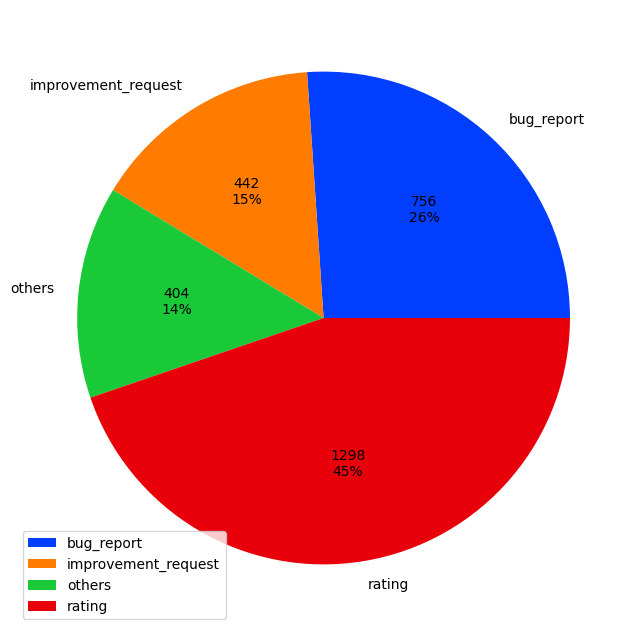

In [6]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

def check_target_dist(df: pd.DataFrame):
	colors = sns.color_palette('bright')
	df.groupby("Label").size().plot(kind="pie", autopct=label_function, colors=colors,
								 wedgeprops = {'linewidth': 10}, legend=True, figsize=(8, 8))
	
	plt.show()
check_target_dist(df)

In [7]:
def sentence_length_data(data: pd.Series):
	return df.review.apply(str.split).apply(len)

def sentence_length_distribution(data: pd.Series):
	sns.violinplot(data)
	sns.boxplot(data)
	plt.show()

In [8]:
sentence_length = sentence_length_data(df.review) 
longest_sentence = np.argmax(sentence_length)
print(f"Longest Sentence: {sentence_length[longest_sentence]}\n{df.review[longest_sentence]}")


Longest Sentence: 576
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد 

In [9]:
empty_sentences = len(sentence_length[sentence_length < 2])
print(f"Number of empty Sentence: {empty_sentences}")

Number of empty Sentence: 0


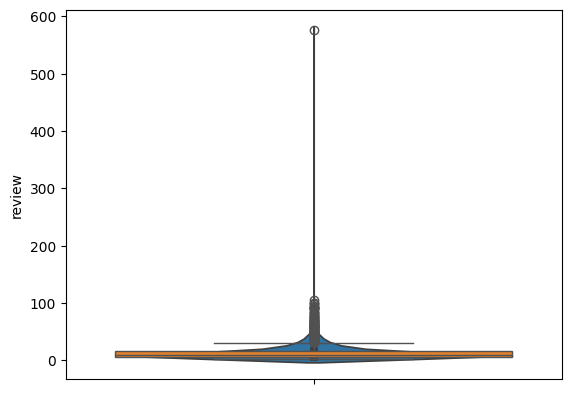

In [10]:
sentence_length_distribution(sentence_length)

In [11]:
Q1 = sentence_length.quantile(0.25)
Q3 = sentence_length.quantile(0.75)
IQR = Q3 - Q1

print("Q1", Q1)
print("Q3", Q3)
outliers = sentence_length[(sentence_length < Q1 - IQR) | (sentence_length > Q3 + IQR)]
print("Number of outliers: ", len(outliers))
print(f"Percentage of Total Entries {len(outliers)/len(df) * 100}%")

Q1 6.0
Q3 16.0
Number of outliers:  281
Percentage of Total Entries 9.689655172413794%


In [12]:
# See these sentences
df_outliers =df.iloc[outliers.index, :]
df_outliers.head()

,review,Label
23,والله فرحنا كثيراً بتطبيق مطبعة الملك فهد لكن ...,improvement_request
32,جيد بالنسبة إلى الأصدقاء الذين تعرفت عليهم وال...,improvement_request
34,المفروض بدل رأيك في الخدمات وملحقاتها مشكلتك ف...,improvement_request
55,شيء طالما انتظرناه مجهود جميل ورائع . إلى ما س...,improvement_request
73,ممتاز جدااا انصح استخدام البرنامج يحل لكم كل ا...,rating


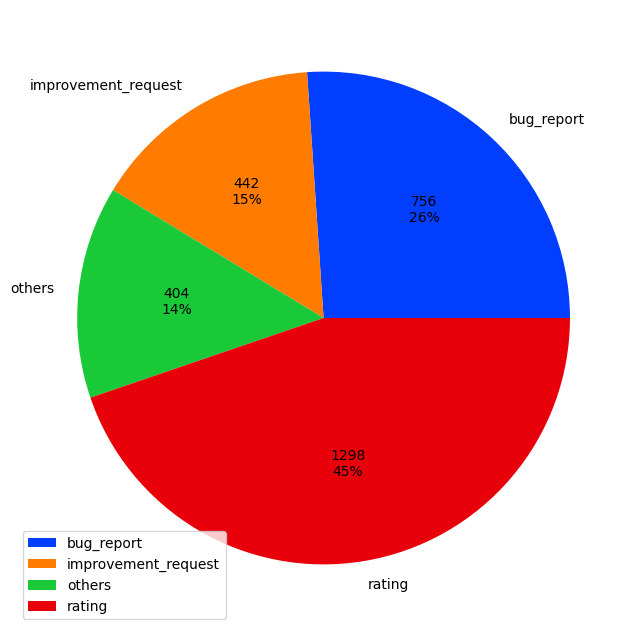

In [13]:
check_target_dist(df)

## Initial Analysis
- Seems like there are no NaN values in our targets nor the predictors.
- Imbalanced data as it is a classification task, this has to be remedied.
- Seems like we have an outlier in the length of our sentences. This would cause problems as most of our data is within 6 to 16 length. The outliers count to around 10% of our sentences, which is too high. Best course is to set our own limit to reviews. The goal is to remove the biggest sentences while preserving as much data as possible and keeping average sentence length as small as possible.


In [14]:
max_length = np.linspace(20, 60, 41) 
for length in max_length:
	print(f"Percentage of outliers with max length {length}: {len(sentence_length[sentence_length > length])/len(df) * 100}%")

Percentage of outliers with max length 20.0: 16.275862068965516%
Percentage of outliers with max length 21.0: 14.931034482758621%
Percentage of outliers with max length 22.0: 13.620689655172413%
Percentage of outliers with max length 23.0: 12.586206896551724%
Percentage of outliers with max length 24.0: 11.655172413793103%
Percentage of outliers with max length 25.0: 10.724137931034484%
Percentage of outliers with max length 26.0: 9.689655172413794%
Percentage of outliers with max length 27.0: 9.137931034482758%
Percentage of outliers with max length 28.0: 8.482758620689655%
Percentage of outliers with max length 29.0: 7.827586206896552%
Percentage of outliers with max length 30.0: 7.310344827586207%
Percentage of outliers with max length 31.0: 6.862068965517241%
Percentage of outliers with max length 32.0: 6.344827586206897%
Percentage of outliers with max length 33.0: 5.827586206896552%
Percentage of outliers with max length 34.0: 5.344827586206897%
Percentage of outliers with max le

In [15]:
df.drop(index=sentence_length[sentence_length > 38].index, axis=1, inplace=True)

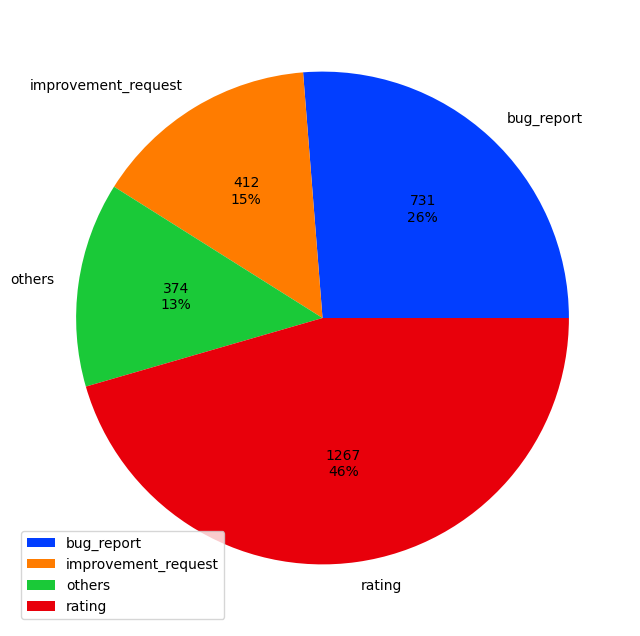

In [16]:
check_target_dist(df)

## Preprocessing

### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.Label = encoder.fit_transform(df.Label)

In [18]:
df.head()

,review,Label
0,يبيله تصليحات كثير,0
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,3
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,1
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,3
4,تبين م لي ي تم ل يب,2


## Text Preprocessing

In [19]:
import nltk
from nltk.corpus import stopwords
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.charsets import EMOJI_ALL_CHARSET


In [20]:
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /Users/malik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
arabic_digits = [digit for digit in '٠١٢٣٤٥٦٧٨٩']
trans = str.maketrans('٠١٢٣٤٥٦٧٨٩', '0123456789')
def translate_numbers(text):
	return ''.join([char.translate(trans) for char in text])


In [22]:
def remove_stopwords(text):
	return ' '.join([word for word in text.split(' ') if word not in arabic_stopwords])

In [23]:
def remove_emojis(text):
	return ''.join([char for char in text if char not in EMOJI_ALL_CHARSET])

In [24]:
df_processed = df.copy()
for normalizer in [
	normalize_alef_ar,
	normalize_alef_maksura_ar,
	normalize_teh_marbuta_ar,
	dediac_ar,
	remove_emojis,
	translate_numbers,
	remove_stopwords]:
	df_processed.review = df_processed.review.apply(normalizer)

In [25]:
df_processed.reset_index(inplace=True, drop=True)
df_processed

,review,Label
0,يبيله تصليحات كثير,0
1,ماتحملت ابدددددا ونا دفعت فلوس,3
2,اتمني منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,1
3,ممتاز وبسيط وتشغيله يؤثر علي سرعه الانترنت,3
4,تبين تم يب,2
...,...,...
2779,يعطي اشعار اخبار ولايوجد اخبار نرجو متابعه الب...,0
2780,مرره معفن مدري الا بالقوه بيدخلنا موقعهم هذاك ...,3
2781,لابد تطويره ليستفاد منو الجميع,1
2782,تطبيق اكثر رائع ومجهود مبارك ،ننتظر المزيد لاث...,3


### Check word count again

In [26]:
sentence_length = sentence_length_data(df_processed.review)
longest = np.argmax(sentence_length)
print(f"Longest Sentence: {sentence_length.max()}\n{df_processed.review[longest]}")

Longest Sentence: 38
تستحق 5نجوم اني خليت 3 نجوم لسبب وهوه ارجو حل مشكله التحديث عندما نترك العبه يوم ارجع يقول تحديث تحياتي احنه مو فاظين لعبه اغلب وقتنه عمل لاتكرهونه العبه اني واصل مرحله 1000بيه


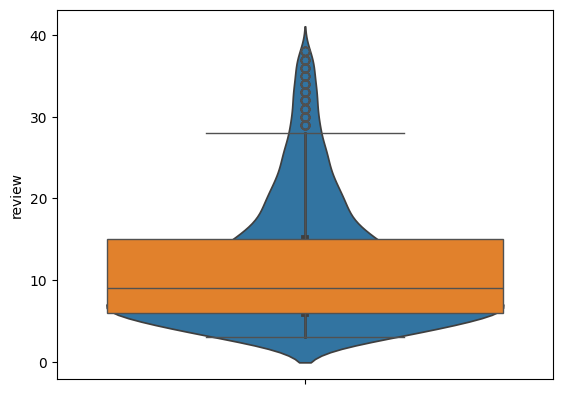

In [27]:
sentence_length_distribution(sentence_length)

## Tokenize

In [28]:
from camel_tools.tokenizers.word import simple_word_tokenize

In [29]:
def tokenize(df: pd.DataFrame, max_len: int):
	vocab = set()
	[vocab.add(special_token) for special_token in ["<START>", "<END>", "<PAD>"]]
	word2idx = {"<PAD>": 0, "<START>": 1, "<END>": 2,}
	df['tokenized'] = df.review.copy()
	idx = 3 
	max_length
	for i, sentence in enumerate(df.review):
		tokenized = simple_word_tokenize(sentence)
		sentence = [1]
		sentence.extend([0] * (longest - len(sentence) - 2))
		for word in tokenized:
			if word not in vocab:
				print(vocab)
				vocab.add(word)
				word2idx[word]=idx
				idx+=1
			sentence.append(word2idx[word])
		sentence.append(2)
		df.loc[i, 'tokenized'] = sentence
			
tokenize(df_processed, longest)

{'<PAD>', '<START>', '<END>'}
{'<PAD>', '<START>', 'يبيله', '<END>'}
{'<END>', 'يبيله', '<PAD>', '<START>', 'تصليحات'}


ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
[1, 0] * 10

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]